# Reducing data complexity, and eliminating covariance, with principal component analysis

Principal component analysis (PCA) may be used for two purposes:

1) Reducing the number of features used. This may be especially useful when there are very many features and computational time is critical.

2) Eliminating covariance between features. Co-variance occurs when the value of one feature has some linkage to another feature. For example weight will, on average, increase as height increases.

Principal component analysis identifies components that explain the variation in the data. The first component will be chosen to capture the greatest variance in the transformed data as possible – that is, by itself, it will give the best estimate of the value of a data point using just one parameter.  Further components are chosen that are ‘orthogonal’ to the previous components which ensures lack of any covariance.

In essence, principal component analysis allows us to reduce the amount of data used with minimal loss in accuracy of a model. Typically the number of components chosen is such that >95-98% of the observed variance is explained.

Let’s look at an example using the Wisconsin Breast Cancer data set. 

As usual we will start with loading required modules, and loading the data set.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#%% Load data
from sklearn import datasets
data_set = datasets.load_breast_cancer()
X=data_set.data
y=data_set.target

We will split our data in training and test data sets. PCA is built using the trainign data set, and may then be applied to the test data set.

In [25]:
# Split into training and tets sets
X_train,X_test,y_train,y_test = (
        train_test_split(X,y,test_size=0.3, random_state=0))

We will normalise our data:

In [26]:
#%% Normalise data
sc=StandardScaler() 
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

And now we will apply PCA. If we pass the argument 'n_components = None' to the PCA method then the PCA will return all components, and the variance explained by each component.

In [27]:
# Apply pca, accesing all components
pca = PCA(n_components = None)
pca.fit(X_train_std)

explained_variance = pca.explained_variance_ratio_
explained_variance_cum_sum = np.cumsum(explained_variance)

Let's look at the variance explained:

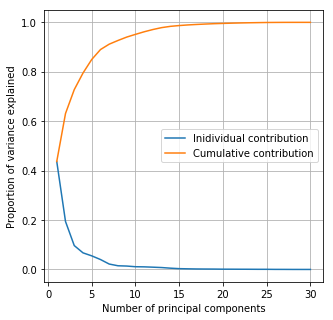

In [28]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
x = np.arange(1, len(explained_variance)+1)
ax.plot(x, explained_variance, label = 'Inidividual contribution')
ax.plot(x, explained_variance_cum_sum, label = 'Cumulative contribution')
ax.set_xlabel('Number of principal components')
ax.set_ylabel('Proportion of variance explained')
ax.legend()
ax.grid()
plt.show()

We can look at the cumulative contribution to explained variance. And we see that 95% of the variance may be explained by 10 features. Our model could be simplified by appling PCA and using the transformed data based on 10 components (instead of 30 features). 14 features would explain >98% of the variance.

In [29]:
list(enumerate(explained_variance_cum_sum))

[(0, 0.43689315296382647),
 (1, 0.631044778687372),
 (2, 0.7276602270650945),
 (3, 0.7948263345632808),
 (4, 0.8498146378719993),
 (5, 0.8899372096523127),
 (6, 0.911767891289488),
 (7, 0.9266601513907545),
 (8, 0.9404012341007773),
 (9, 0.9514149471124791),
 (10, 0.9618975759018142),
 (11, 0.9710597183750846),
 (12, 0.9787227788854884),
 (13, 0.9838650421992904),
 (14, 0.9870613939807314),
 (15, 0.989581078486956),
 (16, 0.9915052299697702),
 (17, 0.9931636721975996),
 (18, 0.9946539396903759),
 (19, 0.9957217128459858),
 (20, 0.9967389650012513),
 (21, 0.9975879198167824),
 (22, 0.9983314125415828),
 (23, 0.9989127081530736),
 (24, 0.9994569309376532),
 (25, 0.999710476406319),
 (26, 0.9999248621075235),
 (27, 0.9999711588199732),
 (28, 0.9999962746519541),
 (29, 0.9999999999999999)]

Choosing 10 components, we re-train the PCA (and print the transformation of the first patient data).

In [30]:
pca = PCA(n_components = 10)
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
print (X_train_pca[0])

[-2.17650596  1.25618056 -0.79259801 -0.78858712  0.17034054 -0.17007413
  0.35187117  0.82314449  0.17808993  0.09931353]


We would then train our favoured machine learning algorithm with the pca data. To predict the classification of unseen data we would transform the test data based on pca fitted to the training data:

In [31]:
X_test_pca = pca.transform(X_test_std)

## The effect of PCA on covariance

We can calculate covariance between features using NumPy, and display as a heat map. This is for normalised data before PCA. Dark colours in the grid represent features that have high covariance.

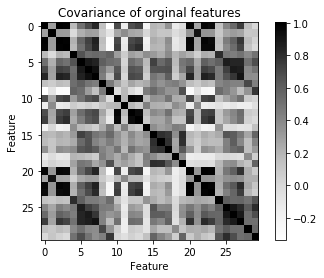

In [32]:
# Plot covariance matrix of original data
cov_original = np.cov(X_train_std.T)
plt.imshow(cov_original, interpolation='nearest', cmap=cm.Greys)
plt.colorbar()
plt.title('Covariance of orginal features')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.show()

Now let's plot the covariance between our 10 components.The diagonal line represents the covariance between a component and itself (i.e. they have the same value). The first component is darker because the magnitude of this component varies more than the others.

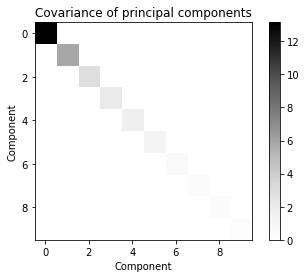

In [33]:
cov_pca = np.cov(X_train_pca.T)
plt.imshow(cov_pca, interpolation='nearest', cmap=cm.Greys)
plt.colorbar()
plt.xlabel('Component')
plt.ylabel('Component')
plt.title('Covariance of principal components')
plt.show()

We can normalise the difference in magnitude between different compnents by using the correlation coefficient rather than the covariance. Here we again see no correlation between any component and any other component (the black diaganal again represents the correlation between one component and itself; i.e. identical values)

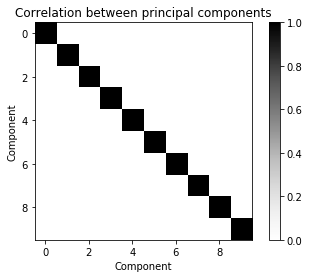

In [34]:
cov_pca = np.corrcoef(X_train_pca.T)
plt.imshow(cov_pca, interpolation='nearest', cmap=cm.Greys)
plt.colorbar()
plt.xlabel('Component')
plt.ylabel('Component')
plt.title('Correlation between principal components')
plt.show()